In [3]:
import tensorflow as tf


### 加载数据集
加载并准备MNIST数据集，将样本从整数转换为浮点数, 将像素数据归一化，从[0,255]区间转到[0,1]区间


In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test/255.0


### 构建机器学习模型
通过堆叠层构建tf.keras.Sequential 模型

传递一个层的列表，直接构建

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10)
])

C:\Users\ChenHao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


对于每个样本，模型会返回一个包含logits 或log-odds分数的向量，每个种类一个

In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.11347849, -0.13692427,  0.48320004, -0.39229605,  0.03639233,
        -0.37884876, -0.33886018, -0.22079779, -0.16142331,  0.07733973]],
      dtype=float32)

tf.nn,softmax将logits转化为每个类的概率

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.0967299 , 0.09448837, 0.17566894, 0.07319339, 0.11236961,
        0.07418428, 0.07721092, 0.08688656, 0.09220164, 0.11706636]],
      dtype=float32)

softmax不可能为所有模型提高精确且数值稳定的损失计算
使用 loss.SparseCategoricalCrossentropy 定义损失函数，接受logit和Ture索引，返回标量损失

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

损失为Ture类的负对数概率，如果模型确定类正确，则损失为0


In [9]:
loss_fn(y_train[:1], predictions).numpy()

np.float32(2.601203)

训练前使用 Model.compile 配置和编译模型，配置损失函数和优化策略。

In [10]:
model.compile(optimizer='adam',
              loss = loss_fn, 
              metrics=['accuracy'])

### 模型训练并评估
使用 Model.fit调整模型参数，导入训练数据，设置训练次数epochs

In [11]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8504 - loss: 0.5064
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9551 - loss: 0.1505
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9671 - loss: 0.1080
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9718 - loss: 0.0924
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9774 - loss: 0.0724


Model.evalute 在验证集或者测试集Test-set上检查模型性能

In [12]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9776 - loss: 0.0722


[0.0722159594297409, 0.9775999784469604]

如果想让模型返回每种类的概率，可封装经过训练的模型，并添加softmax在最后

In [16]:
probability_model = Sequential([model, 
                                tf.keras.layers.Softmax()])
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


对测试集的前5个数据进行预测

In [14]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.8773879e-09, 1.4602097e-09, 3.5177434e-06, 5.9477472e-05,
        1.8053671e-11, 3.1786820e-07, 5.2655698e-14, 9.9993014e-01,
        1.2530305e-07, 6.3560597e-06],
       [3.6705039e-08, 2.9007973e-05, 9.9996758e-01, 3.4290406e-06,
        1.3694294e-15, 3.6572105e-09, 9.1232633e-10, 5.5700209e-13,
        3.3796517e-09, 1.9856345e-14],
       [8.2083254e-08, 9.9914479e-01, 5.6386998e-05, 2.2110808e-06,
        3.2207307e-05, 5.2848704e-06, 7.8136900e-06, 6.2266598e-04,
        1.2828242e-04, 3.4342358e-07],
       [9.9995065e-01, 4.0816923e-11, 1.9120268e-06, 5.0255355e-09,
        1.5453630e-06, 2.6410399e-07, 3.9144401e-05, 2.4838771e-06,
        2.6249269e-09, 4.0821969e-06],
       [2.1506552e-05, 8.3742629e-10, 5.2431951e-06, 6.9764440e-08,
        9.8624462e-01, 1.4934969e-06, 2.1133148e-06, 1.0756060e-03,
        2.0367945e-06, 1.2647258e-02]], dtype=float32)>

同时打印图片和预测结果

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

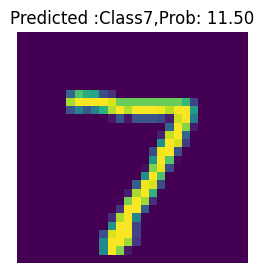

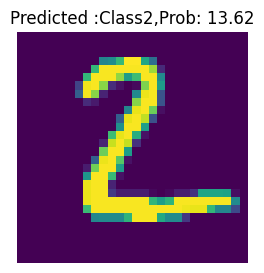

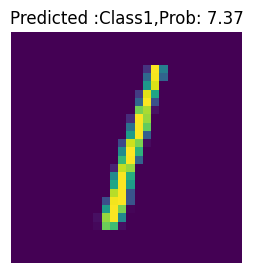

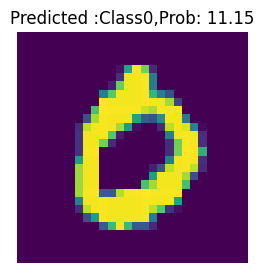

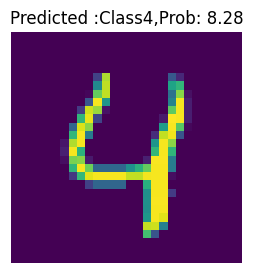

In [19]:
num_samples = 5
#选测试集中的5个样本

for i in range(num_samples):
    image = x_test[i] #获取图像
    pred = predictions[i] #获取图像预测结果
    
    #获取预测类别
    predicted_class = np.argmax(pred)
    predicted_prob = pred[predicted_class] #该类别的概率
    
    #显示图像
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicted :Class{predicted_class},Prob: {predicted_prob:.2f}" )
    plt.show()
    
    
    

逐层添加

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28 , 1)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

C:\Users\ChenHao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
